# Machine Learning HW4
Kyle Lee 2018/11/09

# Clustering Currencies
## a.Data


In [418]:
#import packages, set plot parameters
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = 10, 6

In [419]:
#import data
test=pd.read_csv("Data/FX.csv")

In [420]:
#clean data na values and set col and row names
test.columns=test.iloc[0]
test.index=test.iloc[:,1]
del(test.index.name)
test=test[test.columns[2:]]
test=test.iloc[1:]
# test.drop(test.columns[[0, 1]], axis=1)  
test=test[test.index.isna() == False]

In [422]:
#fill na values
test=test.fillna(method='ffill')

In [423]:
#change the sequence and change it to numeric
test = test.reindex(index=test.index[::-1])
test = test.apply(pd.to_numeric)
test.head()

,USD,EUR,JPY,GBP,CAD,AUD,NZD,CHF,NOK,SEK,...,MXN,PEN,BHD,ILS,JOD,KWD,OMR,QAR,SAR,AED
10/30/2017,1,1.1651,113.18,1.3208,1.2833,0.7688,0.6876,0.9943,8.1512,8.3534,...,19.2397,3.2500,0.37727,3.5235,0.709,0.30274,0.38499,3.6414,3.7501,3.673
10/31/2017,1,1.1646,113.64,1.3283,1.2888,0.7656,0.6847,0.9976,8.1689,8.3776,...,19.1466,3.2505,0.37725,3.5205,0.709,0.30257,0.38500,3.6408,3.7501,3.673
11/1/2017,1,1.1619,114.18,1.3245,1.2865,0.7676,0.6886,1.0033,8.1499,8.4014,...,19.0716,3.2385,0.37720,3.5128,0.709,0.30265,0.38500,3.6414,3.7501,3.673
11/2/2017,1,1.1658,114.08,1.3059,1.2809,0.7713,0.6913,0.9994,8.1357,8.3948,...,18.9820,3.2385,0.37776,3.5082,0.709,0.30274,0.38502,3.6415,3.7502,3.673
11/3/2017,1,1.1608,114.07,1.3077,1.2764,0.7650,0.6907,1.0007,8.1762,8.4337,...,19.2032,3.2435,0.37800,3.5107,0.709,0.30275,0.38502,3.6417,3.7501,3.673


Calculating returns 

In [426]:
#find tickers
tickers=np.array(test.columns)

In [427]:
#calculate 1 day returns
returns=test.pct_change(1)
returns=returns.dropna()

In [429]:
returns

,USD,EUR,JPY,GBP,CAD,AUD,NZD,CHF,NOK,SEK,...,MXN,PEN,BHD,ILS,JOD,KWD,OMR,QAR,SAR,AED
10/31/2017,0.0,-0.000429,0.004064,0.005678,0.004286,-0.004162,-0.004218,0.003319,0.002171,0.002897,...,-0.004839,0.000154,-0.000053,-0.000851,0.0,-0.000562,0.000026,-0.000165,0.000000,0.000000
11/1/2017,0.0,-0.002318,0.004752,-0.002861,-0.001785,0.002612,0.005696,0.005714,-0.002326,0.002841,...,-0.003917,-0.003692,-0.000132,-0.002187,0.0,0.000264,0.000000,0.000165,0.000000,0.000000
11/2/2017,0.0,0.003357,-0.000876,-0.014043,-0.004353,0.004820,0.003921,-0.003887,-0.001742,-0.000786,...,-0.004698,0.000000,0.001485,-0.001310,0.0,0.000297,0.000052,0.000027,0.000027,0.000000
11/3/2017,0.0,-0.004289,-0.000088,0.001378,-0.003513,-0.008168,-0.000868,0.001301,0.004978,0.004634,...,0.011653,0.001544,0.000635,0.000713,0.0,0.000033,0.000000,0.000055,-0.000027,0.000000
11/6/2017,0.0,0.000172,-0.003156,0.007188,-0.004701,0.005359,0.005502,-0.003298,-0.005063,-0.004245,...,-0.009592,-0.001418,-0.000265,-0.001025,0.0,-0.000099,0.000000,0.000000,0.000027,0.000000
11/7/2017,0.0,-0.001981,0.002638,-0.000380,0.005746,-0.005981,-0.006335,0.002406,0.004499,0.000024,...,0.006883,0.001328,0.000132,0.002823,0.0,0.000363,0.000000,0.000000,0.000240,0.000000
11/8/2017,0.0,0.000690,-0.001228,-0.003798,-0.003757,0.004317,0.009419,0.000300,-0.000673,-0.002036,...,-0.003347,0.000987,0.000000,-0.001507,0.0,0.000066,0.000000,0.000000,-0.000107,0.000000
11/9/2017,0.0,0.004053,-0.003513,0.002211,-0.003614,0.000260,-0.002584,-0.006099,-0.004090,-0.000358,...,-0.002148,-0.001201,-0.000079,0.004385,0.0,0.000000,0.000000,-0.000137,0.000027,0.000000
11/10/2017,0.0,0.001976,0.000529,0.003880,-0.000079,-0.002474,-0.001583,0.002113,0.000184,-0.002948,...,0.002988,0.000648,-0.000185,0.006096,0.0,-0.000330,0.000000,0.000000,-0.000053,0.000000
11/13/2017,0.0,0.000171,0.000793,-0.006062,0.004021,-0.004960,-0.004901,0.000201,0.003799,0.003591,...,0.001398,-0.000986,0.000132,-0.001071,0.0,-0.000495,-0.000026,0.000000,-0.000027,0.000000


In [430]:
#calculate return for plotting
return1=test.iloc[-1]/test.iloc[0]-1
return1=np.array(return1)
return1

array([ 0.00000000e+00, -2.25731697e-02, -8.39370914e-03, -3.06632344e-02,
        2.45460921e-02, -8.27263267e-02, -5.11925538e-02,  7.04012873e-03,
        2.94557857e-02,  9.53144827e-02,  4.74986835e-02,  5.07013817e-02,
        5.66739326e-03,  1.32515667e-01,  1.20656655e-01, -1.37571381e-02,
        3.73813674e-02,  1.65343915e-02,  1.48032896e-02,  2.61266929e-02,
       -2.10545312e-03,  2.76371958e-02,  2.30521801e-02,  3.21350589e-02,
        6.79673457e-02,  1.50233400e-01, -1.83309214e-02,  1.15997663e-02,
        4.27976093e-02,  3.78720709e-02,  1.35687745e-01,  4.57626998e-02,
        4.71407431e-01,  1.08576095e+00,  1.30494422e-01,  8.06148644e-02,
        5.81191870e-02,  4.06191365e-02,  3.23076923e-02, -8.21703261e-04,
        5.15112700e-02,  0.00000000e+00,  2.67555321e-03,  2.59305432e-05,
        2.74336786e-05,  2.40001873e-04,  0.00000000e+00])

Calculate volatility

In [432]:
#calc vol
vol=returns.std(axis=0)*np.sqrt(returns.shape[0])
vol=np.array(vol)

Text(0.5,1,'Return and Volatility of FX')

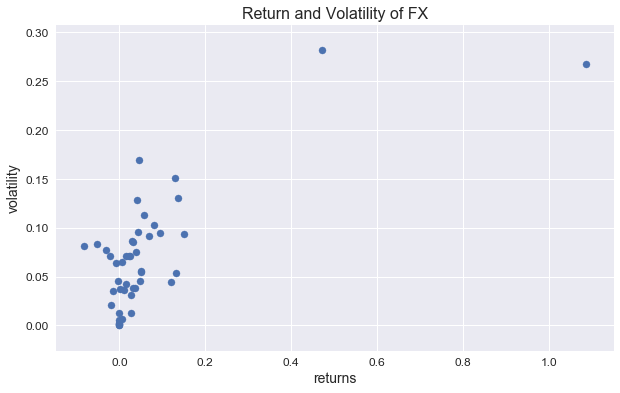

In [435]:
#plot
plt.scatter(return1, vol, s=50)
plt.xlabel('returns')
plt.ylabel('volatility')
plt.title('Return and Volatility of FX',fontsize=16)

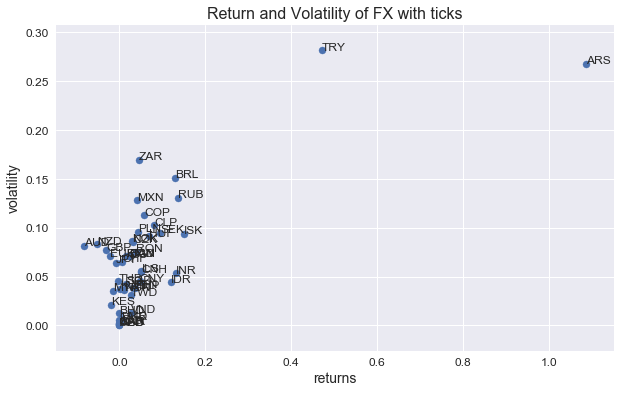

In [436]:
#plot with names of dots
plt.scatter(return1, vol, s=50)
plt.xlabel('returns')
plt.ylabel('volatility')
plt.title('Return and Volatility of FX with ticks',fontsize=16)
for i, txt in enumerate(tickers):
    plt.annotate(txt, (return1[i], vol[i]))

Remove outliers

In [440]:
#create new dataframe to save them
re_vol=pd.DataFrame()
re_vol['return']=return1
re_vol['vol']=vol
re_vol.index=tickers

In [441]:
re_vol=re_vol.drop(['TRY','ARS'])

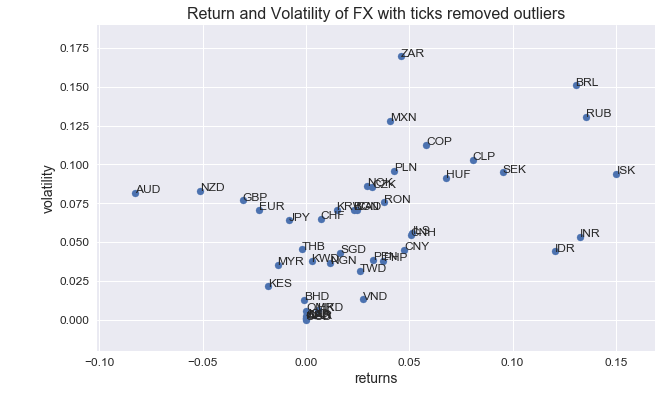

In [443]:
#plot without outliers
plt.scatter(re_vol['return'],re_vol['vol'])
plt.title('Return and Volatility of FX with ticks removed outliers',fontsize=16)
plt.xlabel('returns')
plt.ylabel('volatility')
for i, txt in enumerate(tickers):
    plt.annotate(txt, (return1[i], vol[i]))


### b.K-means  
i. 2~5 clusters  
ii. plot them

In [444]:
#prepare data
X=np.array(re_vol)

In [445]:
from sklearn.cluster import KMeans

Wall time: 230 ms


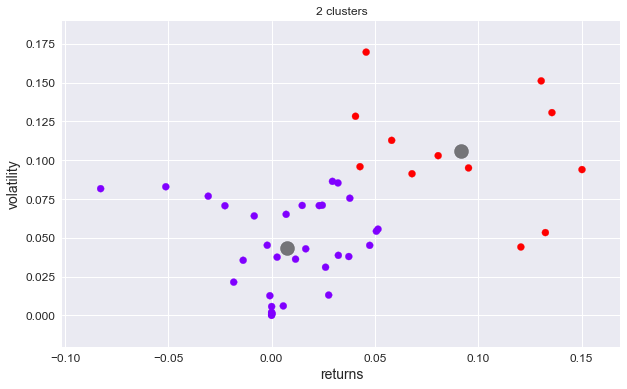

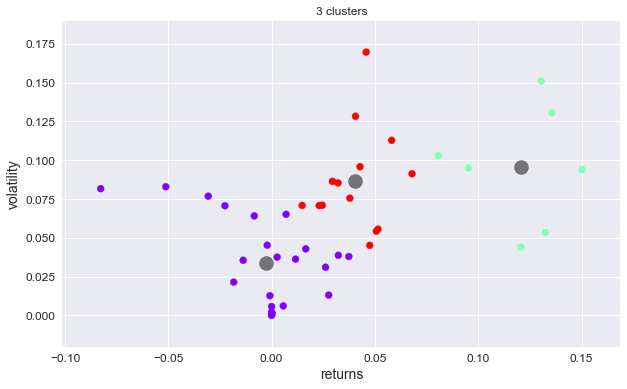

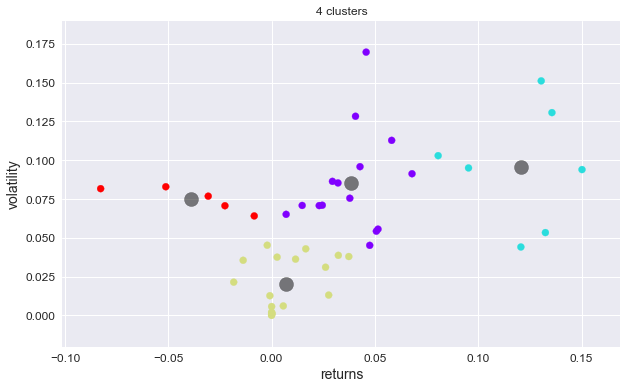

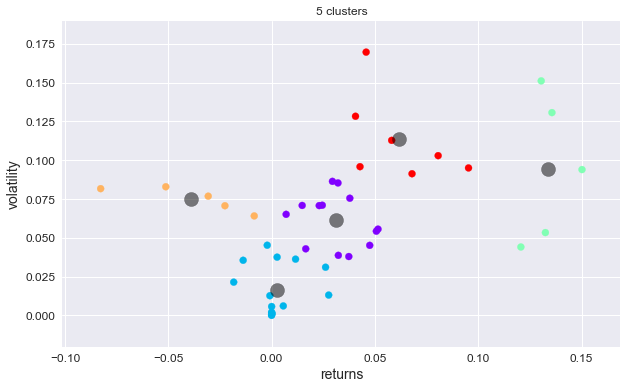

In [446]:
%%time
#Kmeans with graph 2~5 clusters
models=[KMeans(n_clusters=k).fit(X) for k in range(2,6)]
for k in range(2,6):
    kmeans=KMeans(n_clusters=k).fit(X)
    y_kmeans=kmeans.predict(X)
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='rainbow')
    plt.title(str(k)+' clusters')
    plt.xlabel('returns')
    plt.ylabel('volatility')
    centers=kmeans.cluster_centers_
    plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)

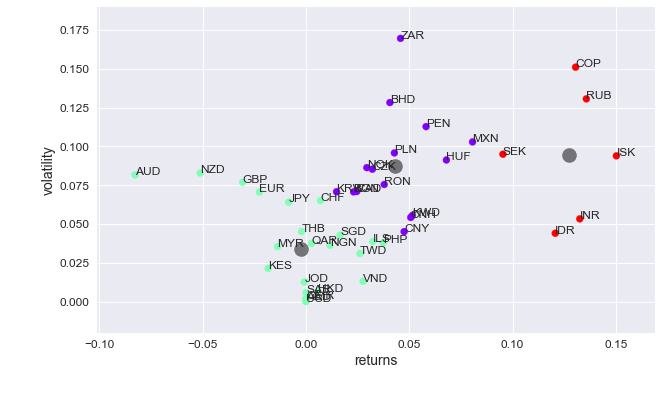

In [448]:
#3 clusters with tickers
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:,0],X[:,1],c=y_kmeans,cmap='rainbow')
plt.xlabel('returns')
plt.ylabel('volatility')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='black',s=200,alpha=0.5)
for i, txt in enumerate(re_vol.index):
    plt.annotate(txt, (return1[i], vol[i]))


Text(0,0.5,'Inertia')

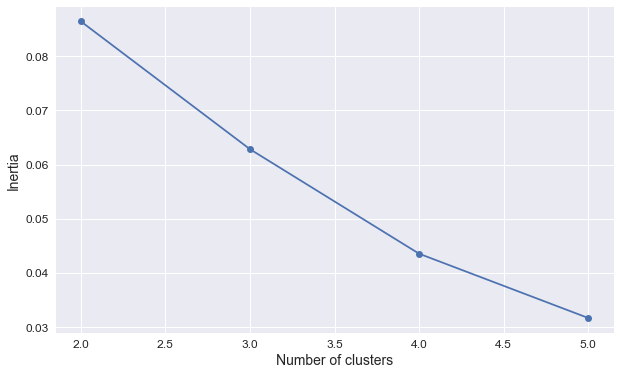

In [449]:
inertia = [m.inertia_ for m in models]
plt.plot(range(2,6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

iii: We can see from the graph of the 3 cluster above, there is definitely an initial grouping.   
We can see that the currencies of well developed countries like JPY, EUR, AUD, TWD are grouped as the left cluster.  
Some African/Eurpoean countries are grouped in the middle group.  
While some other countries (we can see most are from south or southeast Asia) are grouped in the rightmost cluster.

## c.GMM

GMM for 2~5 clusters

Wall time: 198 ms


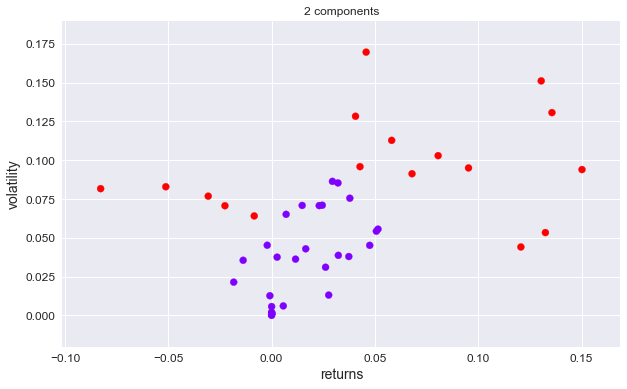

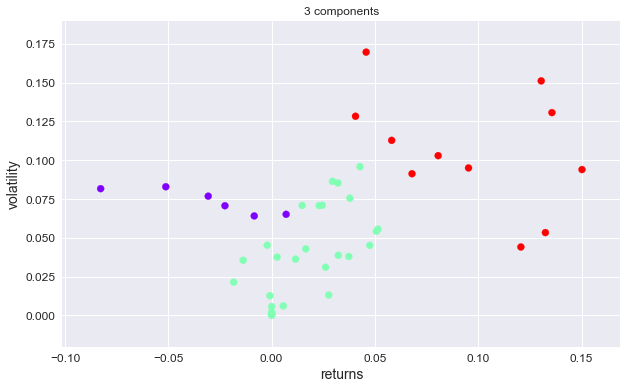

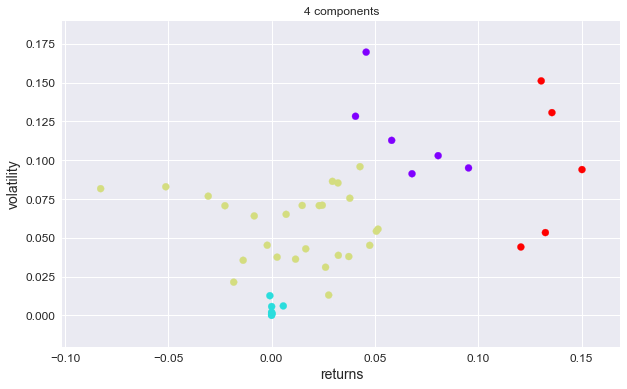

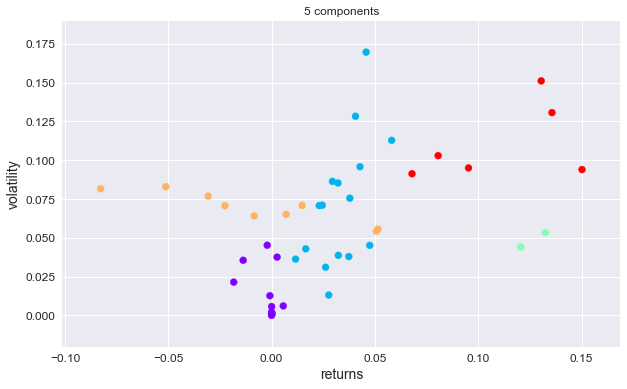

In [451]:
%%time
#GMM for 2~5 clusters
from sklearn.mixture import GaussianMixture
models=[GaussianMixture(n_components=k).fit(X) for k in range(2,6)]
for k in range(2,6):
    gmm=GaussianMixture(n_components=k).fit(X)
    labels=gmm.predict(X)
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=labels,cmap='rainbow')
    plt.title(str(k)+' components')
    plt.xlabel('returns')
    plt.ylabel('volatility')


Text(0,0.5,'volatility')

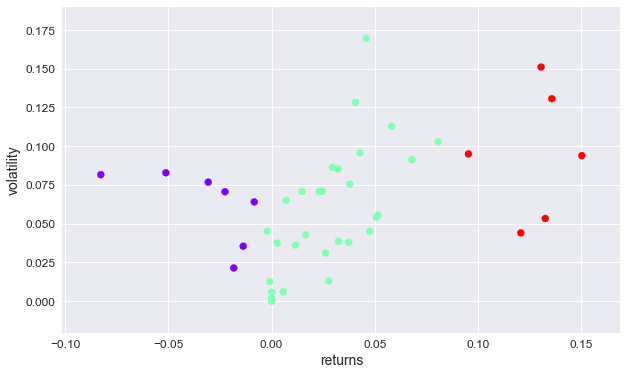

In [453]:
#GMM for 3 clusters
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow')
plt.xlabel('returns')
plt.ylabel('volatility')

plot as probability for 3 clusters

Text(0,0.5,'volatility')

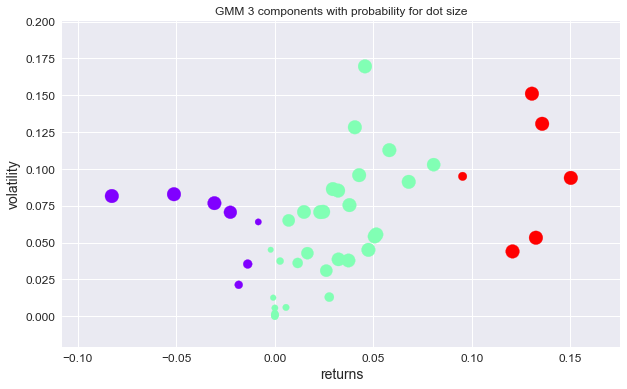

In [458]:
#Adding the dot size as the probability to be shown on graph
probs=gmm.predict_proba(X)
size= 187* probs.max(1)**3 #make it more significant
plt.figure()
plt.title('GMM 3 components with probability for dot size')
plt.scatter(X[:,0],X[:,1],c=labels, cmap='rainbow', s=size)
plt.xlabel('returns')
plt.ylabel('volatility')

Potential Differences:
GMM seems to do better than k-means since gmm does not assume clusters to be of any geometry or structures. But K-Means is easier to interpret.  
Also according to some google, people say K-means has a better runtime than GMM, but for this example, they have similar runtime results.

# 2. Hierarchical Clustering
## a.Data

In [460]:
#import packages
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [461]:
#data prepare
test=pd.read_csv('Data/ETF.csv')

In [462]:
test.head()

,Unnamed: 0,Unnamed: 1,Equity,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84
0,NaN,NaN,SPY,IVV,VTI,VOO,QQQ,VEA,EFA,IEFA,...,EWP,KSA,EZA,QAT,UAE,INDA,INDY,EWS,EWA,EPHE
1,Mo,10/29/2018,263.86,265.61,135.02,242.5,163.23,38.75,61.26,57.56,...,27.51,29.23,47.44,18.37,14.73,29.59,31.42,21.75,19.91,29.45
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fr,10/26/2018,265.33,267.1,135.77,243.76,166.66,38.91,61.43,57.7,...,27.4,29.16,48.29,18.18,14.83,29.36,31.39,21.97,19.96,29.58
4,Th,10/25/2018,270.08,272.02,138.16,248.15,171.06,39.24,61.85,58.13,...,27.34,29.21,48.64,18.56,14.98,29.53,31.57,22.27,20.09,29.22


In [463]:
test.columns=test.iloc[0]
test.index=test.iloc[:,1]
del(test.index.name)
test=test[test.columns[2:]]
test=test.iloc[1:]
test=test[test.index.isna() == False]
test=test.fillna(method='ffill')

test = test.reindex(index=test.index[::-1])
test = test.apply(pd.to_numeric)
test.head()

,SPY,IVV,VTI,VOO,QQQ,VEA,EFA,IEFA,VWO,IJH,...,EWP,KSA,EZA,QAT,UAE,INDA,INDY,EWS,EWA,EPHE
10/30/2017,256.75,258.52,132.06,235.86,151.58,43.98,69.34,64.99,44.38,182.04,...,33.45,25.160,59.46,15.05,17.720,35.030,36.00,25.52,22.76,36.65
10/31/2017,257.15,258.81,132.33,236.13,152.15,44.18,69.63,65.25,44.63,182.96,...,33.84,25.200,59.91,15.13,17.730,35.245,36.17,25.53,22.70,37.01
11/1/2017,257.49,259.23,132.44,236.54,152.10,44.28,69.70,65.35,44.74,182.53,...,33.81,24.935,59.95,15.09,17.720,35.610,36.52,25.70,22.81,37.10
11/2/2017,257.59,259.37,132.47,236.64,151.81,44.37,69.91,65.48,44.88,182.61,...,33.79,25.120,60.52,15.14,17.680,35.680,36.55,25.74,22.98,37.79
11/3/2017,258.45,260.18,132.82,237.43,153.27,44.33,69.80,65.42,44.62,183.15,...,33.22,25.200,59.79,15.02,17.755,35.610,36.52,25.66,22.85,37.30


In [464]:
test

,SPY,IVV,VTI,VOO,QQQ,VEA,EFA,IEFA,VWO,IJH,...,EWP,KSA,EZA,QAT,UAE,INDA,INDY,EWS,EWA,EPHE
10/30/2017,256.75,258.52,132.06,235.86,151.58,43.98,69.34,64.990,44.38,182.04,...,33.45,25.1600,59.46,15.0500,17.7200,35.030,36.00,25.52,22.76,36.65
10/31/2017,257.15,258.81,132.33,236.13,152.15,44.18,69.63,65.250,44.63,182.96,...,33.84,25.2000,59.91,15.1300,17.7300,35.245,36.17,25.53,22.70,37.01
11/1/2017,257.49,259.23,132.44,236.54,152.10,44.28,69.70,65.350,44.74,182.53,...,33.81,24.9350,59.95,15.0900,17.7200,35.610,36.52,25.70,22.81,37.10
11/2/2017,257.59,259.37,132.47,236.64,151.81,44.37,69.91,65.480,44.88,182.61,...,33.79,25.1200,60.52,15.1400,17.6800,35.680,36.55,25.74,22.98,37.79
11/3/2017,258.45,260.18,132.82,237.43,153.27,44.33,69.80,65.420,44.62,183.15,...,33.22,25.2000,59.79,15.0200,17.7550,35.610,36.52,25.66,22.85,37.30
11/6/2017,258.85,260.62,133.07,237.79,153.79,44.41,69.90,65.530,45.05,183.83,...,33.12,25.2700,60.42,14.9000,17.5000,35.790,36.65,25.61,22.94,38.01
11/7/2017,258.67,260.49,132.84,237.69,153.88,44.26,69.64,65.290,44.77,182.67,...,32.71,25.0500,59.87,14.5800,17.2700,34.970,35.96,25.64,22.90,37.42
11/8/2017,259.11,260.94,133.06,238.04,154.50,44.45,69.87,65.510,44.93,183.16,...,32.79,25.2100,60.28,14.4163,16.9100,35.090,35.99,25.81,23.12,37.67
11/9/2017,258.17,259.99,132.52,237.18,153.69,44.15,69.47,65.065,44.76,182.21,...,32.68,25.1750,60.05,14.2629,16.8700,34.800,35.80,25.83,23.17,37.67
11/10/2017,258.09,259.81,132.54,237.04,153.68,44.04,69.28,64.910,44.59,182.18,...,32.61,25.0200,59.04,14.3050,16.7800,34.680,35.75,25.86,23.17,37.28


In [465]:
#calculating returns
returns=test.pct_change(1)
returns=returns.dropna()

In [466]:
returns #1day

,SPY,IVV,VTI,VOO,QQQ,VEA,EFA,IEFA,VWO,IJH,...,EWP,KSA,EZA,QAT,UAE,INDA,INDY,EWS,EWA,EPHE
10/31/2017,0.001558,0.001122,0.002045,0.001145,0.003760,0.004548,0.004182,0.004001,0.005633,0.005054,...,0.011659,0.001590,0.007568,0.005316,0.000564,0.006138,0.004722,0.000392,-0.002636,0.009823
11/1/2017,0.001322,0.001623,0.000831,0.001736,-0.000329,0.002263,0.001005,0.001533,0.002465,-0.002350,...,-0.000887,-0.010516,0.000668,-0.002644,-0.000564,0.010356,0.009677,0.006659,0.004846,0.002432
11/2/2017,0.000388,0.000540,0.000227,0.000423,-0.001907,0.002033,0.003013,0.001989,0.003129,0.000438,...,-0.000592,0.007419,0.009508,0.003313,-0.002257,0.001966,0.000821,0.001556,0.007453,0.018598
11/3/2017,0.003339,0.003123,0.002642,0.003338,0.009617,-0.000902,-0.001573,-0.000916,-0.005793,0.002957,...,-0.016869,0.003185,-0.012062,-0.007926,0.004242,-0.001962,-0.000821,-0.003108,-0.005657,-0.012966
11/6/2017,0.001548,0.001691,0.001882,0.001516,0.003393,0.001805,0.001433,0.001681,0.009637,0.003713,...,-0.003010,0.002778,0.010537,-0.007989,-0.014362,0.005055,0.003560,-0.001949,0.003939,0.019035
11/7/2017,-0.000695,-0.000499,-0.001728,-0.000421,0.000585,-0.003378,-0.003720,-0.003662,-0.006215,-0.006310,...,-0.012379,-0.008706,-0.009103,-0.021477,-0.013143,-0.022911,-0.018827,0.001171,-0.001744,-0.015522
11/8/2017,0.001701,0.001728,0.001656,0.001473,0.004029,0.004293,0.003303,0.003370,0.003574,0.002682,...,0.002446,0.006387,0.006848,-0.011228,-0.020845,0.003432,0.000834,0.006630,0.009607,0.006681
11/9/2017,-0.003628,-0.003641,-0.004058,-0.003613,-0.005243,-0.006749,-0.005725,-0.006793,-0.003784,-0.005187,...,-0.003355,-0.001388,-0.003816,-0.010641,-0.002365,-0.008264,-0.005279,0.000775,0.002163,0.000000
11/10/2017,-0.000310,-0.000692,0.000151,-0.000590,-0.000065,-0.002492,-0.002735,-0.002382,-0.003798,-0.000165,...,-0.002142,-0.006157,-0.016819,0.002952,-0.005335,-0.003448,-0.001397,0.001161,0.000000,-0.010353
11/13/2017,0.000930,0.001116,0.000528,0.001181,0.001236,-0.003860,-0.004186,-0.004314,-0.002018,0.002251,...,-0.002760,0.006395,-0.003218,-0.031108,0.008939,-0.012687,-0.011748,0.002320,-0.006905,-0.008315


In [467]:
return2=test.iloc[-1]/test.iloc[0]-1
return2=np.array(return2)
vol2=returns.std(axis=0)*np.sqrt(returns.shape[0])
vol2=np.array(vol2)
ticker2=np.array(test.columns)

Text(0,0.5,'volatility')

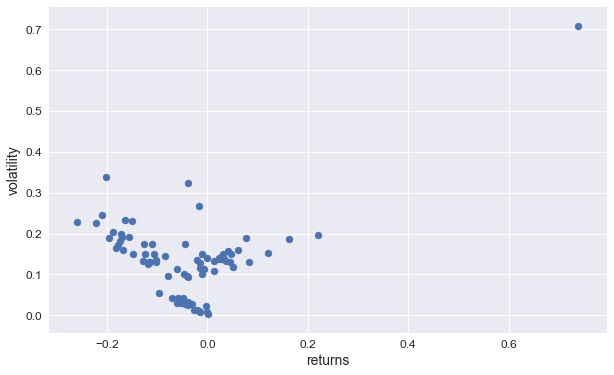

In [469]:
#graphing to look for outliers
plt.scatter(return2,vol2,s=50)
plt.xlabel('returns')
plt.ylabel('volatility')


In [471]:
etf=pd.DataFrame()
etf['returns']=return2
etf['vol']=vol2
etf.index=ticker2
etf[etf.returns>0.5] #this is the outlier

,returns,vol
OILU,0.73879,0.707684


In [472]:
etf=etf.drop('OILU')

Text(0,0.5,'volatility')

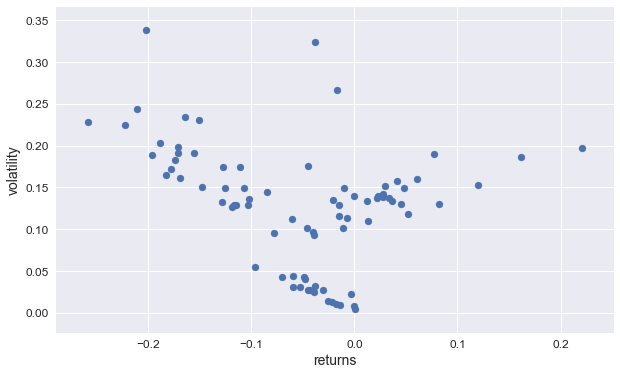

In [473]:
plt.scatter(etf.returns,etf.vol)
plt.xlabel('returns')
plt.ylabel('volatility')

## b.Clustering

In [474]:
#calculate cov
ret_cov=returns.cov()
ret_cov

,SPY,IVV,VTI,VOO,QQQ,VEA,EFA,IEFA,VWO,IJH,...,EWP,KSA,EZA,QAT,UAE,INDA,INDY,EWS,EWA,EPHE
0,,,,,,,,,,,,,,,,,,,,,
SPY,0.000078,0.000078,0.000076,0.000077,0.000098,0.000060,0.000060,0.000060,0.000079,0.000068,...,6.045425e-05,4.781636e-05,1.204486e-04,3.565641e-05,4.618747e-05,6.158792e-05,5.823066e-05,5.430057e-05,6.100783e-05,5.283070e-05
IVV,0.000078,0.000080,0.000077,0.000078,0.000099,0.000060,0.000060,0.000060,0.000080,0.000070,...,6.124595e-05,4.768552e-05,1.226679e-04,3.556369e-05,4.743860e-05,6.195940e-05,5.839565e-05,5.545022e-05,6.217645e-05,5.387026e-05
VTI,0.000076,0.000077,0.000076,0.000076,0.000096,0.000059,0.000058,0.000058,0.000077,0.000069,...,5.887319e-05,4.617923e-05,1.178773e-04,3.435926e-05,4.520681e-05,5.986784e-05,5.653679e-05,5.340231e-05,5.945935e-05,5.106411e-05
VOO,0.000077,0.000078,0.000076,0.000077,0.000097,0.000059,0.000059,0.000059,0.000078,0.000068,...,5.918504e-05,4.725417e-05,1.189107e-04,3.524346e-05,4.677408e-05,6.013953e-05,5.686694e-05,5.385822e-05,6.022035e-05,5.316858e-05
QQQ,0.000098,0.000099,0.000096,0.000097,0.000143,0.000073,0.000072,0.000072,0.000104,0.000083,...,6.596279e-05,6.413693e-05,1.562212e-04,4.795579e-05,6.181599e-05,7.798140e-05,7.362578e-05,6.888247e-05,7.417747e-05,6.786416e-05
VEA,0.000060,0.000060,0.000059,0.000059,0.000073,0.000063,0.000063,0.000063,0.000078,0.000053,...,6.964860e-05,4.235202e-05,1.254998e-04,3.167193e-05,3.634791e-05,5.978058e-05,5.529436e-05,5.609028e-05,6.156692e-05,4.992860e-05
EFA,0.000060,0.000060,0.000058,0.000059,0.000072,0.000063,0.000067,0.000066,0.000076,0.000053,...,7.349592e-05,4.248319e-05,1.262923e-04,3.432706e-05,3.949002e-05,5.827491e-05,5.413694e-05,5.758898e-05,6.438290e-05,4.950378e-05
IEFA,0.000060,0.000060,0.000058,0.000059,0.000072,0.000063,0.000066,0.000067,0.000077,0.000053,...,7.324561e-05,4.341423e-05,1.266024e-04,3.405375e-05,3.976662e-05,5.954840e-05,5.492844e-05,5.773281e-05,6.469567e-05,5.045612e-05
VWO,0.000079,0.000080,0.000077,0.000078,0.000104,0.000078,0.000076,0.000077,0.000133,0.000069,...,7.870705e-05,6.145282e-05,2.138089e-04,4.962546e-05,5.576694e-05,1.045528e-04,9.627380e-05,8.299245e-05,7.987589e-05,8.275606e-05


In [475]:
temp=pdist(etf,metric='euclidean')
etf_dist=pd.DataFrame(squareform(temp),columns=etf.index,index=etf.index)

In [476]:
etf_dist

,SPY,IVV,VTI,VOO,QQQ,VEA,EFA,IEFA,VWO,IJH,...,EWP,KSA,EZA,QAT,UAE,INDA,INDY,EWS,EWA,EPHE
SPY,0.000000,0.001993,0.005613,0.000996,0.070025,0.147253,0.144589,0.142392,0.205709,0.048677,...,0.207822,0.141928,0.303363,0.201111,0.197582,0.190221,0.158672,0.175757,0.153222,0.229395
IVV,0.001993,0.000000,0.006340,0.002949,0.068824,0.147185,0.144477,0.142282,0.205045,0.048661,...,0.207258,0.141546,0.301875,0.200818,0.197113,0.189434,0.157995,0.175379,0.152842,0.228721
VTI,0.005613,0.006340,0.000000,0.005829,0.075129,0.141827,0.139196,0.136998,0.200966,0.043246,...,0.202925,0.147540,0.300650,0.206714,0.192556,0.185694,0.153961,0.170621,0.148093,0.224663
VOO,0.000996,0.002949,0.005829,0.000000,0.070338,0.147631,0.144987,0.142789,0.206344,0.049049,...,0.208416,0.141787,0.304288,0.200922,0.198136,0.190907,0.159314,0.176273,0.153740,0.230033
QQQ,0.070025,0.068824,0.075129,0.070338,0.000000,0.205850,0.202534,0.200430,0.250457,0.112014,...,0.255030,0.084972,0.315893,0.143911,0.247246,0.232162,0.204670,0.227942,0.206021,0.273312
VEA,0.147253,0.147185,0.141827,0.147631,0.205850,0.000000,0.004175,0.005733,0.078639,0.098582,...,0.074676,0.287089,0.227511,0.346780,0.060922,0.075104,0.048785,0.037903,0.024319,0.099615
EFA,0.144589,0.144477,0.139196,0.144987,0.202534,0.004175,0.000000,0.002202,0.077941,0.095956,...,0.074552,0.284047,0.225226,0.343754,0.061049,0.073363,0.045913,0.037725,0.021867,0.099414
IEFA,0.142392,0.142282,0.136998,0.142789,0.200430,0.005733,0.002202,0.000000,0.079559,0.093757,...,0.076361,0.281888,0.226065,0.341593,0.062938,0.074542,0.046467,0.039561,0.022824,0.101187
VWO,0.205709,0.205045,0.200966,0.206344,0.250457,0.078639,0.077941,0.079559,0.000000,0.160162,...,0.011170,0.335287,0.157753,0.394348,0.022064,0.020352,0.047060,0.041073,0.058551,0.023706
IJH,0.048677,0.048661,0.043246,0.049049,0.112014,0.098582,0.095956,0.093757,0.160162,0.000000,...,0.161318,0.189664,0.272384,0.249151,0.150376,0.146206,0.113597,0.128027,0.105567,0.183840


ii. agglomerative clustering for single and complete linkages

In [477]:
cls_sing=linkage(etf.dropna(), method='single',metric='euclidean')
cls_sing

array([[0.00000000e+00, 3.00000000e+00, 9.96113921e-04, 2.00000000e+00],
       [2.00000000e+00, 1.00000000e+01, 1.58757078e-03, 2.00000000e+00],
       [1.00000000e+00, 8.10000000e+01, 1.99282924e-03, 3.00000000e+00],
       [2.40000000e+01, 2.60000000e+01, 2.15822308e-03, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 2.20199323e-03, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 2.86146491e-03, 2.00000000e+00],
       [3.30000000e+01, 4.00000000e+01, 3.64292778e-03, 2.00000000e+00],
       [3.60000000e+01, 4.10000000e+01, 3.93668071e-03, 2.00000000e+00],
       [4.50000000e+01, 5.30000000e+01, 4.07218320e-03, 2.00000000e+00],
       [5.00000000e+00, 8.50000000e+01, 4.17511668e-03, 3.00000000e+00],
       [3.90000000e+01, 8.40000000e+01, 4.22677044e-03, 3.00000000e+00],
       [2.80000000e+01, 8.80000000e+01, 4.24128479e-03, 3.00000000e+00],
       [8.20000000e+01, 8.30000000e+01, 4.50039162e-03, 5.00000000e+00],
       [3.00000000e+01, 9.20000000e+01, 4.58057790e

<IPython.core.display.Javascript object>


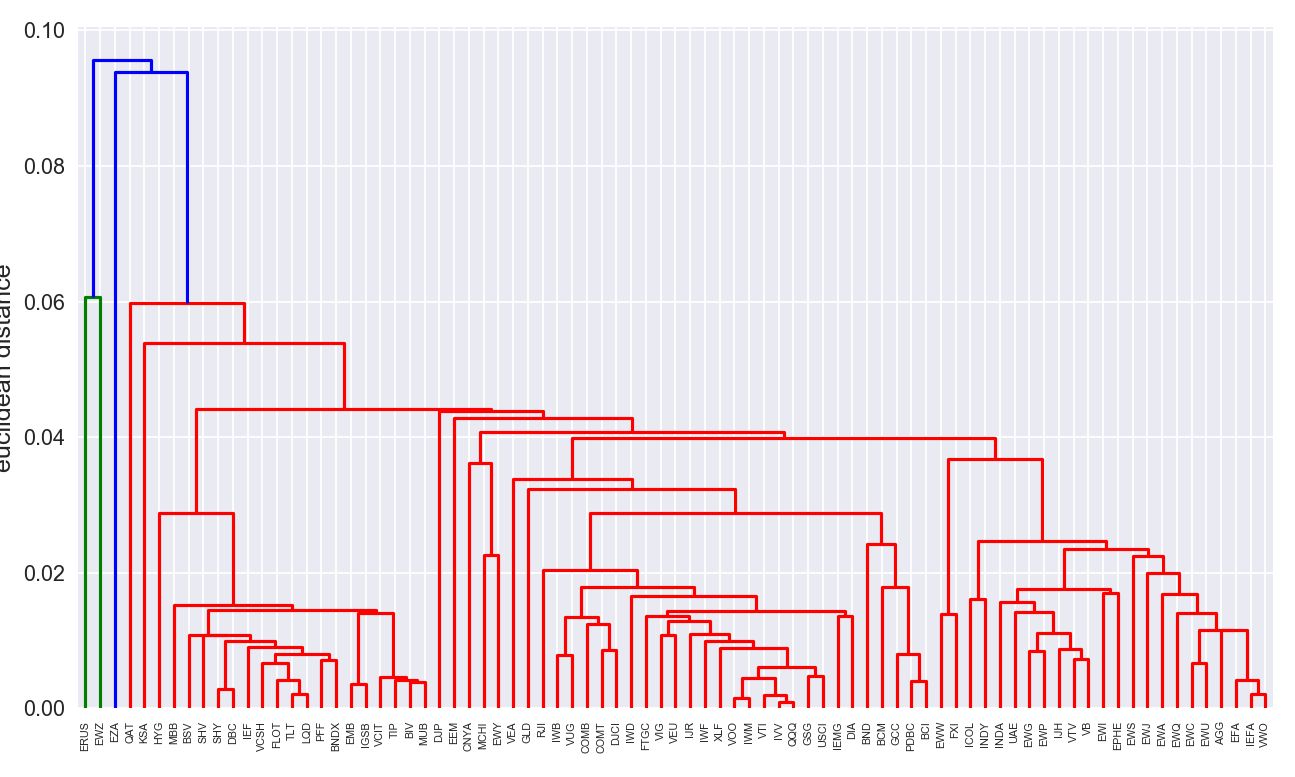

Text(55.625,0.5,'euclidean distance')

In [479]:
%matplotlib notebook
dendr=dendrogram(cls_sing, labels=etf.index)
plt.tight_layout()
plt.ylabel('euclidean distance')


In [480]:
cls_comp=linkage(etf.dropna(), method='complete',metric='euclidean')
cls_comp

array([[0.00000000e+00, 3.00000000e+00, 9.96113921e-04, 2.00000000e+00],
       [2.00000000e+00, 1.00000000e+01, 1.58757078e-03, 2.00000000e+00],
       [2.40000000e+01, 2.60000000e+01, 2.15822308e-03, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 2.20199323e-03, 2.00000000e+00],
       [3.50000000e+01, 4.30000000e+01, 2.86146491e-03, 2.00000000e+00],
       [1.00000000e+00, 8.10000000e+01, 2.94940444e-03, 3.00000000e+00],
       [3.30000000e+01, 4.00000000e+01, 3.64292778e-03, 2.00000000e+00],
       [3.60000000e+01, 4.10000000e+01, 3.93668071e-03, 2.00000000e+00],
       [4.50000000e+01, 5.30000000e+01, 4.07218320e-03, 2.00000000e+00],
       [2.80000000e+01, 3.00000000e+01, 4.58057790e-03, 2.00000000e+00],
       [4.60000000e+01, 4.90000000e+01, 4.71534121e-03, 2.00000000e+00],
       [5.00000000e+00, 8.40000000e+01, 5.73297937e-03, 3.00000000e+00],
       [8.20000000e+01, 8.60000000e+01, 6.34001257e-03, 5.00000000e+00],
       [3.90000000e+01, 8.30000000e+01, 6.38484922e

<IPython.core.display.Javascript object>


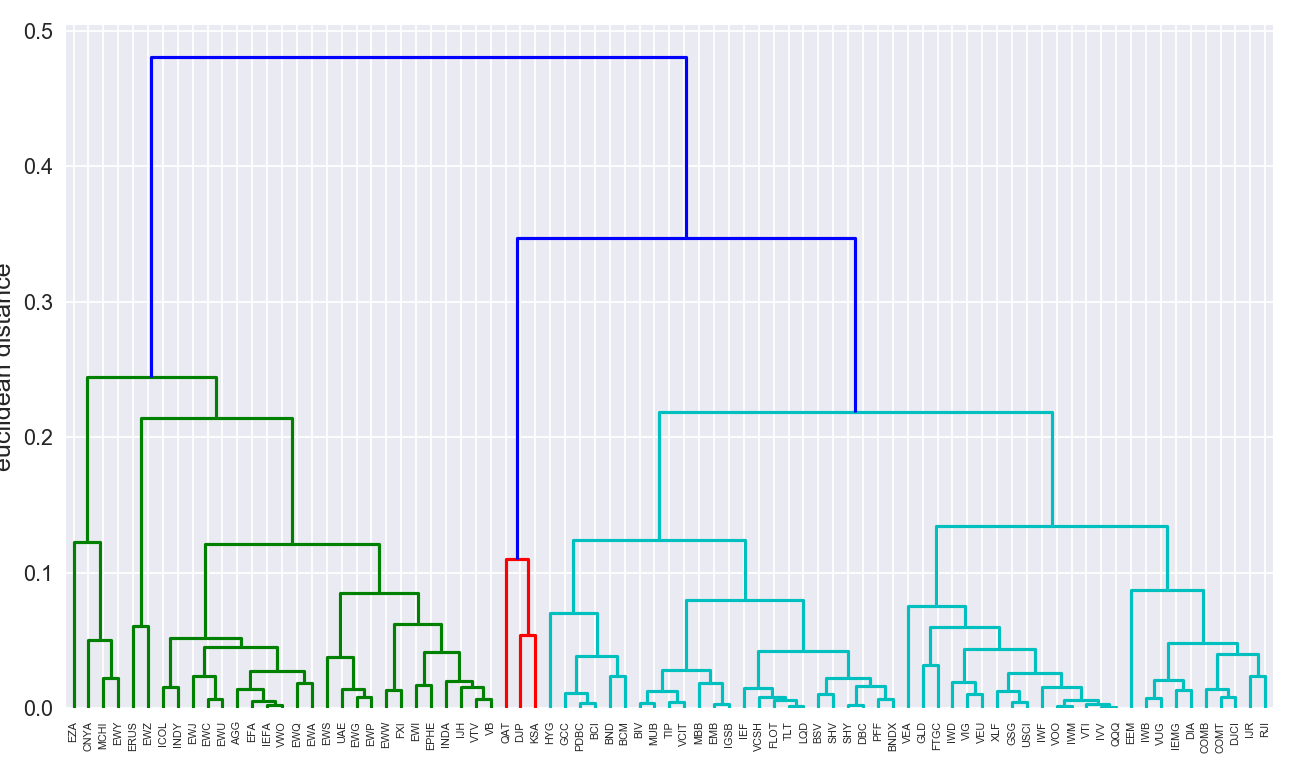

Text(62.25,0.5,'euclidean distance')

In [481]:
%matplotlib notebook
dendr=dendrogram(cls_comp, labels=etf.index)
plt.tight_layout()
plt.ylabel('euclidean distance')


In [415]:
for i in range(2,6):
    ac=AgglomerativeClustering(n_clusters=i, affinity='euclidean',linkage='complete')
    print('ac.fit_predict for ',i,' clusters:\n',ac.fit_predict(etf.dropna()),'\n')

ac.fit_predict for  2  clusters:
 [0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 1] 

ac.fit_predict for  3  clusters:
 [1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 2 0 0 0 0 0 0] 

ac.fit_predict for  4  clusters:
 [0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 3 1 3 1 3 1 1 1 1 2 3
 2 1 1 1 1 1 1] 

ac.fit_predict for  5  clusters:
 [1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 1 4 1 2 1 1 1 1 4 4 4 1 1 0 0 0 0 0 0 3 0 3 0 3 0 0 0 0 2 3
 2 0 0 0 0 0 0] 



iv. For intuitive groupings, we can see that for the complete linkage dendrogram, the left part is mostly etfs of other countries, like the EZA is for south Africa, CNYA for China, EWJ for Japan, and so on.  
The right part of the dendrogram seems like US equity ETFs, like QQQ for NASDAQ, SPY for SP500, and such.   
For the middle part, it seems to be fixed income ETFs, like AGG for aggregate bond, BND for total bond market, TIP for ishares TIPS bond.
So the grouping seems to be divided by the type of ETF(foreign, equity, fixed income)